# PART_2
2. a) How about multiple linear regression (from scratch) analysis?<br> Can you predict the phone's rating based on its pixel density, screen size, weight, RAM, processor frequency, screen-to-body ratio, height, internal memory, capacity, and resolution using 80-20 train-test split ratio? (Using gradient descent approach).<br> 
b) What is the MSE for this model? Also explore R-squared (R2) error.



3. a) Can you visualise the relationship between the phone's rating and each of its features using scatter plots (Individual scatter plot for each feature)?<br>
b)  Which features have a strong linear relationship with the rating, and which features appear to have little or no impact on the rating?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
df=pd.read_csv('mobile_data (1).csv')

In [3]:
x_1=df['Pixel Density']/max(df['Pixel Density'])
x_2=df['Screen Size']/max(df['Screen Size'])
x_3=df['Weight']/max(df['Weight'])
x_4=df['RAM']/max(df['RAM'])
x_5=df['Processor_frequency']/max(df['Processor_frequency'])
x_6=df['Screen to Body Ratio (calculated)']/max(df['Screen to Body Ratio (calculated)'])
x_7=df['Height']/max(df['Height'])
x_8=df['Internal Memory']/max(df['Internal Memory'])
x_9=df['Capacity']/max(df['Capacity'])
x_10=df['Resolution']/max(df['Resolution'])
y=df['Rating']/max(df['Rating'])

In [4]:
random.seed(123)
X=random.sample([k for k in range(len(y))], int(len(y)*0.8))

In [43]:
X_features=[[1 for i in range(len(y))],x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10]
def J(w):    # Objective Function
    s=0
    for i in X:
        p=0
        for j in range(len(w)):
            p+=w[j]*X_features[j][i]
        s+=(p-y[i])**2
    return s/(2*len(X))
def gradJ(w):
    gr=[]
    for j in range(len(w)):
        s=0       
        for i in X:
            p=0
            for k in range(len(w)):
                p+=w[k]*X_features[k][i]
            s+=((p-y[i])*X_features[j][i])
        gr.append(s/len(X))
    return np.array(gr)

In [7]:
w_0=np.array([0 for i in range(11)])
print(J(w_0))
print(gradJ(w_0))

0.33881249999999996
[-0.81977941 -0.49633821 -0.68375547 -0.39970521 -0.01592687 -0.5370084
 -0.68162593 -0.70699701 -0.07988224 -0.20110956 -0.31839118]


In [8]:
#This is the function used in the last LAB Here alpha is fixed
def SteepestDescent(f,gradf,initialGuess=np.array([0 for i in range(11)]),iterations=1000,tolerance=10**-5,StepL=0.001):
    k=0
    w_0=initialGuess
    while k<iterations and np.linalg.norm(gradf(w_0))>tolerance:
        p=-gradf(w_0)
        w_0=w_0+StepL*p
        k=k+1
    print('minimum value will be:',f(w_0),'at',w_0,'Number of iterations:',k)
    return w_0,f(w_0)
 

In [9]:
w_0,s=SteepestDescent(J,gradJ)
print('Weights are given by : ',w_0)
print('MSE: ',s)

minimum value will be: 0.0035898361636314937 at [0.18806282 0.10880724 0.15296947 0.08982958 0.00447009 0.11986185
 0.15289511 0.16031527 0.01679008 0.04450544 0.06694671] Number of iterations: 1000
Weights are given by :  [0.18806282 0.10880724 0.15296947 0.08982958 0.00447009 0.11986185
 0.15289511 0.16031527 0.01679008 0.04450544 0.06694671]
MSE:  0.0035898361636314937


Clearly we will have the model $$y=0.18806282+0.10880724x_1+0.15296947x_2+0.08982958x_3+ 0.00447009x_4+ 0.11986185
 x_5+0.15289511x_6+ 0.16031527x_7+ 0.01679008x_8+ 0.04450544x_9+ 0.06694671x_{10}$$

In [19]:
y_predict=[]
y_test=[]
X_test=set([k for k in range(len(y))])-set(X)
for i in X_test:
    y_p=0
    y_test.append(y[i])
    for j in range(11):
        y_p+=w_0[j]*X_features[j][i]
    y_predict.append(y_p)
#print([max(df['Rating'])*i for i in y_predict])
#print([max(df['Rating'])*i for i in y_test])
Predictions=pd.DataFrame({'Actual_Rating':[max(df['Rating'])*i for i in y_test],'Predicted_Rating':[max(df['Rating'])*i for i in y_predict]})
Predictions

,Actual_Rating,Predicted_Rating
0,4.5,4.138934
1,4.2,3.818378
2,4.1,3.973917
3,4.5,4.665045
4,4.4,4.385611
...,...,...
64,4.3,4.384645
65,3.9,4.256824
66,2.8,4.020817
67,3.7,2.822436


In [26]:
All_Columns=list(df.columns)
Features=All_Columns[1:-1]
print(Features)

['Pixel Density', 'Screen Size', 'Weight', 'RAM', 'Processor_frequency', 'Screen to Body Ratio (calculated)', 'Height', 'Internal Memory', 'Capacity', 'Resolution']


In [41]:
#Again getting features without normalising
x_1=df['Pixel Density']
x_2=df['Screen Size']
x_3=df['Weight']
x_4=df['RAM']
x_5=df['Processor_frequency']
x_6=df['Screen to Body Ratio (calculated)']
x_7=df['Height']
x_8=df['Internal Memory']
x_9=df['Capacity']
x_10=df['Resolution']


In [44]:
print('MSE for the model will be: ',J(w_0))

MSE for the model will be:  27462.818418700343


There is no liner relation between Pixel Density and Rating 


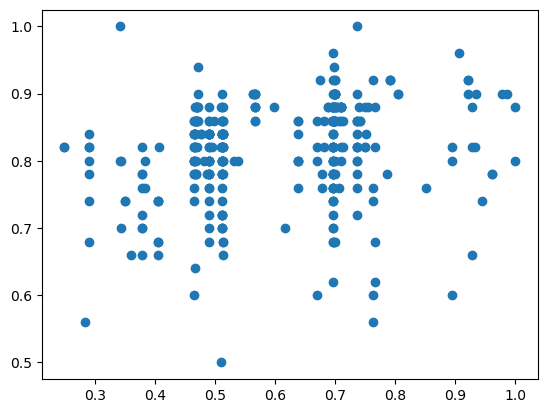

In [27]:
print('There is no liner relation between {} and {} :'.format(Features[1-1],All_Columns[-1]))
plt.scatter(x_1,y)
plt.show()

There is no strong linear relation between Screen Size and Rating :


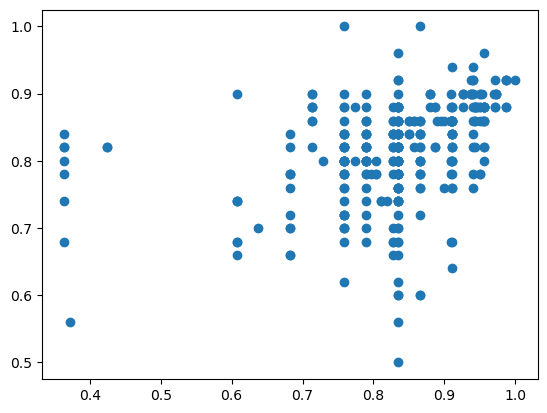

In [30]:
print('There is no strong linear relation between {} and {} :'.format(Features[2-1],All_Columns[-1]))
plt.scatter(x_2,y)
plt.show()

There is not good  linear relation between Weight and Rating 


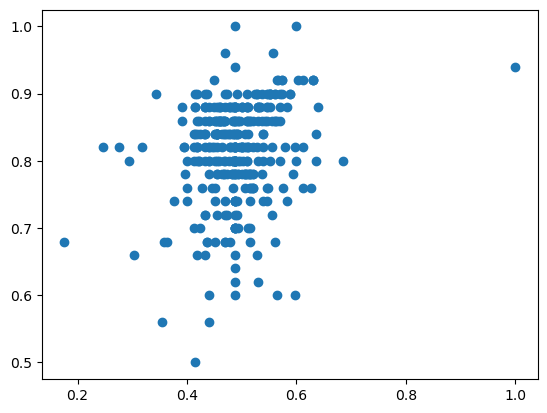

In [32]:
print('There is not good  linear relation between {} and {} '.format(Features[3-1],All_Columns[-1]))
plt.scatter(x_3,y)
plt.show()

There is not good  linear relation between RAM and Rating 


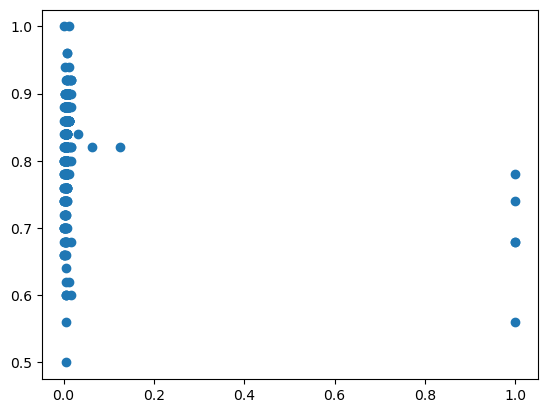

In [34]:
print('There is not good  linear relation between {} and {} '.format(Features[4-1],All_Columns[-1]))
plt.scatter(x_4,y)
plt.show()

There is not good  linear relation between Processor_frequency and Rating 


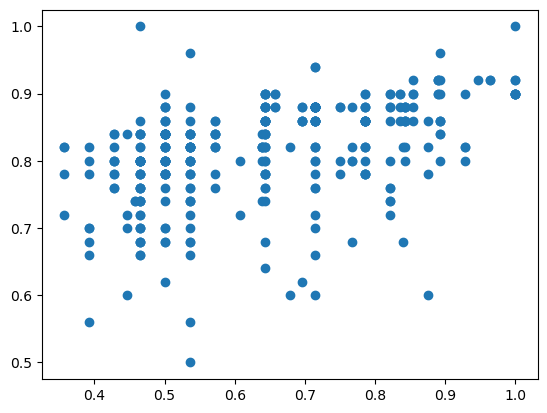

In [35]:
print('There is not good  linear relation between {} and {} '.format(Features[5-1],All_Columns[-1]))
plt.scatter(x_5,y)
plt.show()

There is not good  linear relation between Screen to Body Ratio (calculated) and Rating 


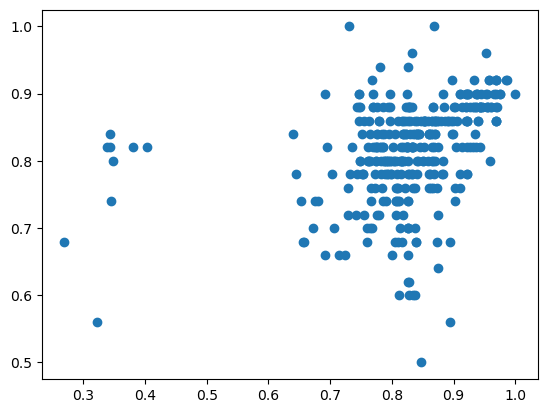

In [36]:
print('There is not good  linear relation between {} and {} '.format(Features[6-1],All_Columns[-1]))
plt.scatter(x_6,y)
plt.show()

There is not good  linear relation between Height and Rating 


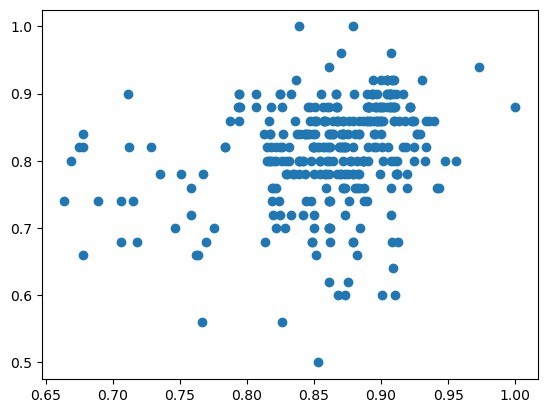

In [37]:
print('There is not good  linear relation between {} and {} '.format(Features[7-1],All_Columns[-1]))
plt.scatter(x_7,y)
plt.show()

There is not good  linear relation between Internal Memory and Rating 


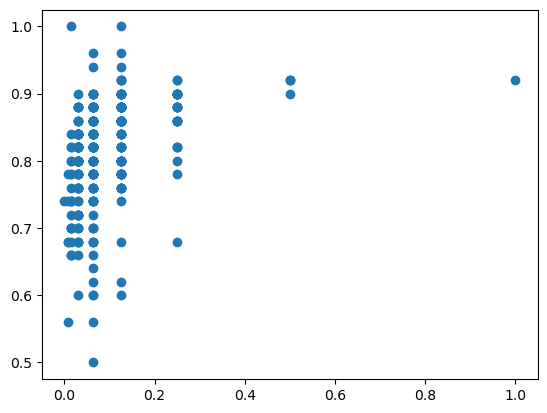

In [38]:
print('There is not good  linear relation between {} and {} '.format(Features[8-1],All_Columns[-1]))
plt.scatter(x_8,y)
plt.show()

There is not good  linear relation between Capacity and Rating 


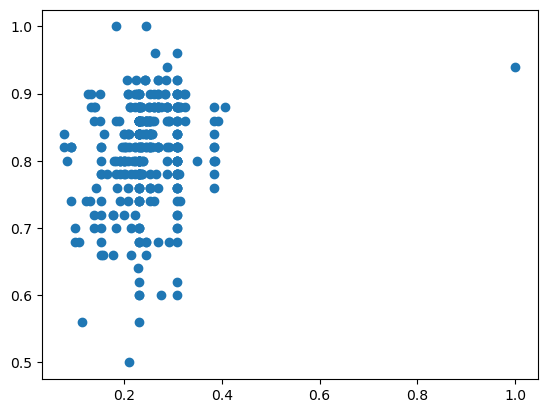

In [39]:
print('There is not good  linear relation between {} and {} '.format(Features[9-1],All_Columns[-1]))
plt.scatter(x_9,y)
plt.show()

There is not good  linear relation between Resolution and Rating 


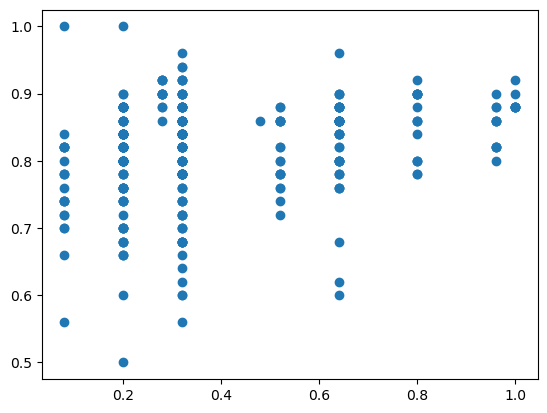

In [40]:
print('There is not good  linear relation between {} and {} '.format(Features[10-1],All_Columns[-1]))
plt.scatter(x_10,y)
plt.show()

In [9]:
min(x_4)

0.001953125